In [25]:
# Has multi-dimensional arrays and matrices.
# Has a large collection of mathematical functions to operate on these arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd

# Data visualization tools.
import seaborn as sns

import mesa

In [26]:
from mesa import Agent, Model
from mesa.time import RandomActivation

class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, unique_id, model):
        # Pass the parameters to the parent class.
        super().__init__(unique_id, model)

        # Create the agent's attribute and set the initial values.
        self.wealth = 10
        self.prev_wealth = 10
        self.giving = True


    def say_hi(self):
        # The agent's step will go here.
        # For demonstration purposes we will print the agent's unique_id
        print(f"Hi, I am an agent, you can call me {self.unique_id!s}.")

    def say_wealth(self):
        # The agent's step will go here.
        # FIXME: need to print the agent's wealth
        print(f"Agent {self.unique_id}: I have {self.wealth} wealth.")

    def exchange(self):
        # Verify agent has some wealth
        if self.wealth > 0 and self.giving:

            other_agent = self.random.choice(self.model.agents)

            if other_agent is not None:
                give_amount = self.wealth*self.model.give_proportion
                other_agent.wealth += give_amount
                self.wealth -= give_amount

    def bookkeeping(self):
        give_prob = ((self.wealth-self.prev_wealth)/5) + self.model.base_give_prob

        self.giving=give_prob>(self.random.random())

        self.prev_wealth = self.wealth




class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n, give_proportion, base_give_prob, seed=None):
        super().__init__(seed=seed)
        self.num_agents = n
        self.give_proportion = give_proportion
        self.base_give_prob = base_give_prob
        self.schedule = RandomActivation(self)

        for i in range(self.num_agents):
            agent = MoneyAgent(i+1, self)
            self.schedule.add(agent)

    def step(self):
        """Advance the model by one step."""
        # This function psuedo-randomly reorders the list of agent objects and
        # then iterates through calling the function passed in as the parameter
        self.agents.do("bookkeeping")
        self.agents.shuffle_do("exchange")

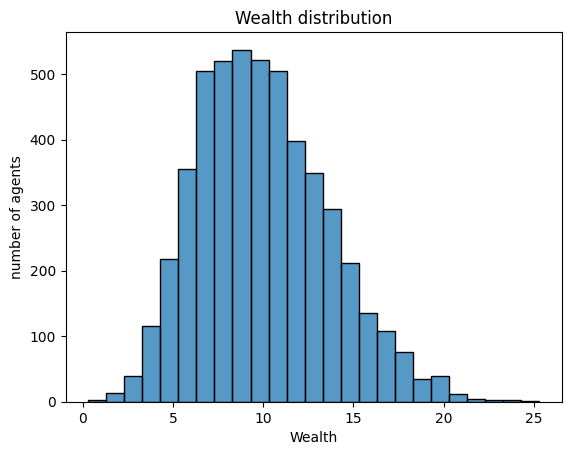

In [27]:
all_wealth = []
for _ in range(100):

    agents = 50
    steps = 50
    give_proportion = 0.2
    base_give_prob = 0.6

    # Run the model
    model = MoneyModel(agents, give_proportion, base_give_prob)
    for _ in range(steps):
        model.step()

    # Store the results
    for agent in model.agents:
        all_wealth.append(agent.wealth)

# Use seaborn
g = sns.histplot(all_wealth, discrete=True)
g.set(title="Wealth distribution", xlabel="Wealth", ylabel="number of agents");